In [48]:
import pickle
import glob
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

environment = 'LunarLander-v2'
identifier = 'Target-DQN-NormalMemory'

number = 1500
files = glob.glob(identifier + "/" + environment + "*.h5")
episode = -1
font = 16

# Get last file and episode
for f in files:
    ep = int(f.split("_",1)[1].replace(".h5", ""))
    if ep > episode:
        file = f
        episode = ep

# Read variables
with open( file.replace(".h5","") + '.pkl', 'rb') as f:
    episode, epsilon, steps, uid, reward, memory = pickle.load(f)

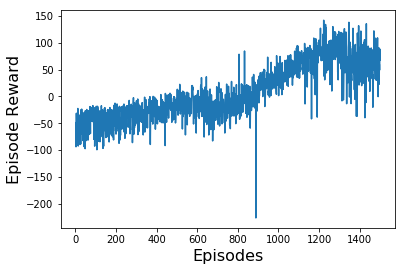

In [49]:
x = []
y = []

for each in reward[0:number]:
    x.append(each[0])
    y.append(each[2])

plt.plot(x, y)
plt.xlabel('Episodes', fontsize=font)
plt.ylabel('Episode Reward', fontsize=font)

plt.savefig('Report/images/rewardOverEpisodes' + identifier + '.jpeg')

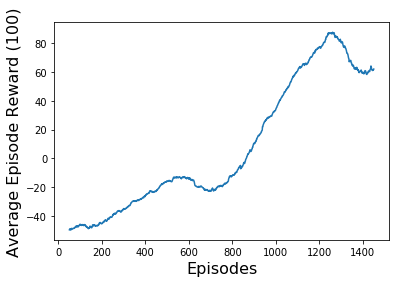

In [50]:
import numpy as np
import math

N = 100

y_mean = np.convolve(y, np.ones((N,))/N, mode='valid')

plt.plot(x[math.floor(N/2)-1:-math.ceil(N/2)], y_mean)
plt.xlabel('Episodes', fontsize=font)
plt.ylabel('Average Episode Reward (' + str(N) + ')', fontsize=font)

plt.savefig('Report/images/movingAverage' + identifier + '.jpeg')

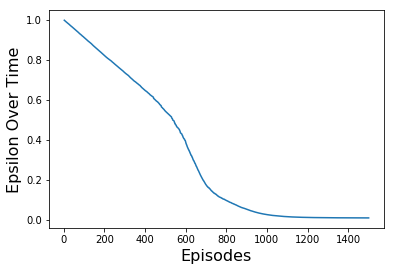

In [51]:
epsilon_start = 1.0                 # start epsilon
epsilon_end = 0.01                  # minimum epsilon
epsilon_decay = 0.00001             # speed of decay

epsilon = []
episodes = 0
for each in reward[0:number]:
    episodes += each[1]
    epsilon.append(epsilon_end + (epsilon_start - epsilon_end) * math.exp(-epsilon_decay * episodes))
    
plt.plot(x, epsilon)
plt.xlabel('Episodes', fontsize=font)
plt.ylabel('Epsilon Over Time', fontsize=font)
plt.savefig('Report/images/epsilon' + identifier + '.jpeg')